# AI-Powered Demand Forecasting & Inventory Optimization to Reduce Food Waste in Retail/E-Commerce

##### Food wastage is a significant challenge for retail and e-commerce businesses, particularly for perishable products. Overstocking causes spoilage and financial losses, while understocking results in missed sales opportunities.  

##### This project is an end-to-end data science solution combining **data analysis, machine learning, and inventory optimization to reduce food wastage. It predicts future demand for perishable items, calculates optimal reorder quantities, and estimates potential waste reduction, helping businesses save costs and improve sustainability.

## Goals & Objectives


1. Predict daily demand for perishable items using machine learning models.  
2. Optimize inventory levels to reduce overstocking and food wastage.  
3. Provide actionable insights to retail managers on high-risk products.  
4. Visualize sales, inventory, and spoilage trends using dashboards.  
5. Integrate optional GenAI features for interactive decision support.




## We will proceed with a step-by-step walkthrough of the project, ensuring clear articulation of every stage.

### Step 1: Loading,cleaning & Explore the Data (EDA)
### Step 2: Feature Engineering
### Step 3: Modeling
### Step 4: Inventory Optimization
### Step 5: Building GenAI Assistant


# Step 1: Loading, Cleaning & Explore the data (EDA)

In [104]:
# Import Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [80]:
# Load the Dataset

df = pd.read_csv(r'C:\Users\mites\Desktop\Final Project\data\Grocery_Inventory_and_Sales_Dataset.csv')

In [81]:
# Quick look at the Data

print("Dataset Shape:", df.shape)         
print("\nColumn Names:", df.columns.tolist())  
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())



Dataset Shape: (990, 16)

Column Names: ['Product_ID', 'Product_Name', 'Catagory', 'Supplier_ID', 'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Date_Received', 'Last_Order_Date', 'Expiration_Date', 'Warehouse_Location', 'Sales_Volume', 'Inventory_Turnover_Rate', 'Status']

Data Types:
 Product_ID                 object
Product_Name               object
Catagory                   object
Supplier_ID                object
Supplier_Name              object
Stock_Quantity              int64
Reorder_Level               int64
Reorder_Quantity            int64
Unit_Price                 object
Date_Received              object
Last_Order_Date            object
Expiration_Date            object
Warehouse_Location         object
Sales_Volume                int64
Inventory_Turnover_Rate     int64
Status                     object
dtype: object

First 5 Rows:
     Product_ID     Product_Name             Catagory  Supplier_ID  \
0  29-205-1132       Sushi Ri

In [82]:
# Checking for Missing and duplicate values

print("\nMissing Values:\n", df.isnull().sum())
print("\nNumber of Duplicate Rows:", df.duplicated().sum())



Missing Values:
 Product_ID                 0
Product_Name               0
Catagory                   1
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
dtype: int64

Number of Duplicate Rows: 0


In [83]:
df.dropna(subset=['Catagory'], inplace=True) # dropping the '1' missing value in Catagory.
df.rename(columns={'Catagory': 'Category'}, inplace=True) # replacing CATAGORY to category. 

print(df.isnull().sum())

Product_ID                 0
Product_Name               0
Category                   0
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
dtype: int64


In [84]:
df.isnull().sum()


Product_ID                 0
Product_Name               0
Category                   0
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
dtype: int64

In [85]:
# Summary statistics

print("\nNumeric Summary:\n", df.describe())


Numeric Summary:
        Stock_Quantity  Reorder_Level  Reorder_Quantity  Sales_Volume  \
count      989.000000     989.000000        989.000000    989.000000   
mean        55.595551      51.245703         51.896866     58.948433   
std         26.310629      29.094069         29.531557     23.002384   
min         10.000000       1.000000          1.000000     20.000000   
25%         33.000000      26.000000         25.000000     39.000000   
50%         56.000000      53.000000         54.000000     58.000000   
75%         79.000000      77.000000         77.000000     78.000000   
max        100.000000     100.000000        100.000000    100.000000   

       Inventory_Turnover_Rate  
count               989.000000  
mean                 50.165824  
std                  28.809489  
min                   1.000000  
25%                  25.000000  
50%                  50.000000  
75%                  75.000000  
max                 100.000000  


In [86]:
# Value counts for categorical columns

if 'Category' in df.columns:
    print("Category Counts:", df['Category'].value_counts())

if 'Supplier_Name' in df.columns:
    print("Supplier Counts:", df['Supplier_Name'].value_counts())

Category Counts: Category
Fruits & Vegetables    331
Dairy                  180
Grains & Pulses        162
Seafood                 90
Oils & Fats             77
Beverages               75
Bakery                  74
Name: count, dtype: int64
Supplier Counts: Supplier_Name
Katz          12
Meevee        10
Quatz          9
Vinder         7
Quinu          7
              ..
Babbleblab     1
Babbleset      1
Meetz          1
Trilith        1
Gabcube        1
Name: count, Length: 350, dtype: int64


In [110]:
# changing data type
# Parse dates


df['Unit_Price'] = df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)
df['Date_Received'] = pd.to_datetime(df['Date_Received'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])
df['Expiration_Date'] = pd.to_datetime(df['Expiration_Date'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_ID               989 non-null    object        
 1   Product_Name             989 non-null    object        
 2   Category                 989 non-null    object        
 3   Supplier_ID              989 non-null    object        
 4   Supplier_Name            989 non-null    object        
 5   Stock_Quantity           989 non-null    int64         
 6   Reorder_Level            989 non-null    int64         
 7   Reorder_Quantity         989 non-null    int64         
 8   Unit_Price               989 non-null    float64       
 9   Date_Received            989 non-null    datetime64[ns]
 10  Last_Order_Date          989 non-null    datetime64[ns]
 11  Expiration_Date          989 non-null    datetime64[ns]
 12  Warehouse_Location       989 non-null    

In [89]:
# Create new derived columns

# Sales Revenue = Sales_Volume * Unit_Price
if 'Sales_Volume' in df.columns and 'Unit_Price' in df.columns:
    df['Sales_Revenue'] = df['Sales_Volume'] * df['Unit_Price']
    
   

In [90]:
print(df.dtypes)

Product_ID                         object
Product_Name                       object
Category                           object
Supplier_ID                        object
Supplier_Name                      object
Stock_Quantity                      int64
Reorder_Level                       int64
Reorder_Quantity                    int64
Unit_Price                        float64
Date_Received              datetime64[ns]
Last_Order_Date            datetime64[ns]
Expiration_Date            datetime64[ns]
Warehouse_Location                 object
Sales_Volume                        int64
Inventory_Turnover_Rate             int64
Status                             object
Sales_Revenue                     float64
dtype: object


In [91]:
df['Sales_Revenue'] = pd.to_numeric(df['Sales_Revenue'], errors='coerce')
print(df[['Product_Name', 'Sales_Revenue']].head(10))

        Product_Name  Sales_Revenue
0         Sushi Rice          144.0
1     Arabica Coffee         1700.0
2         Black Rice          186.0
3    Long Grain Rice          142.5
4               Plum          248.0
5  All-Purpose Flour           59.5
6           Corn Oil          167.5
7        Egg (Goose)           52.5
8       Greek Yogurt          168.0
9         Egg (Duck)           27.0


C:\Users\mites\AppData\Local\Temp\ipykernel_70892\4081243982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


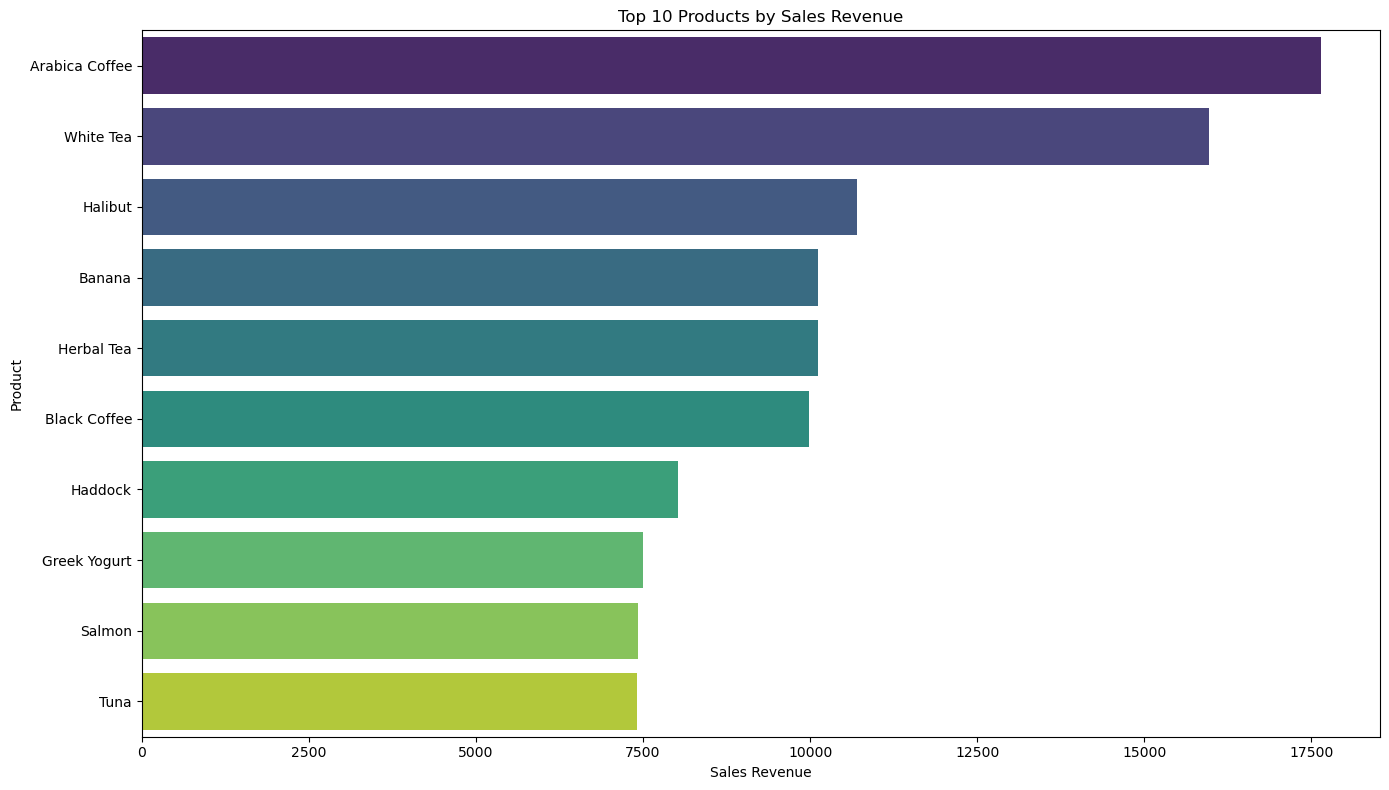

In [92]:
# EDA plots

# Top 10 prodcuts by sales revenue

#Shows which products are making the most money.
#Helps business know where to focus marketing, stock, and promotions.


if 'Sales_Revenue' in df.columns and 'Product_Name' in df.columns:
    top_products = df.groupby('Product_Name')['Sales_Revenue'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(14,8))
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title("Top 10 Products by Sales Revenue")
    plt.xlabel("Sales Revenue")
    plt.ylabel("Product")
    plt.tight_layout()
    plt.show()


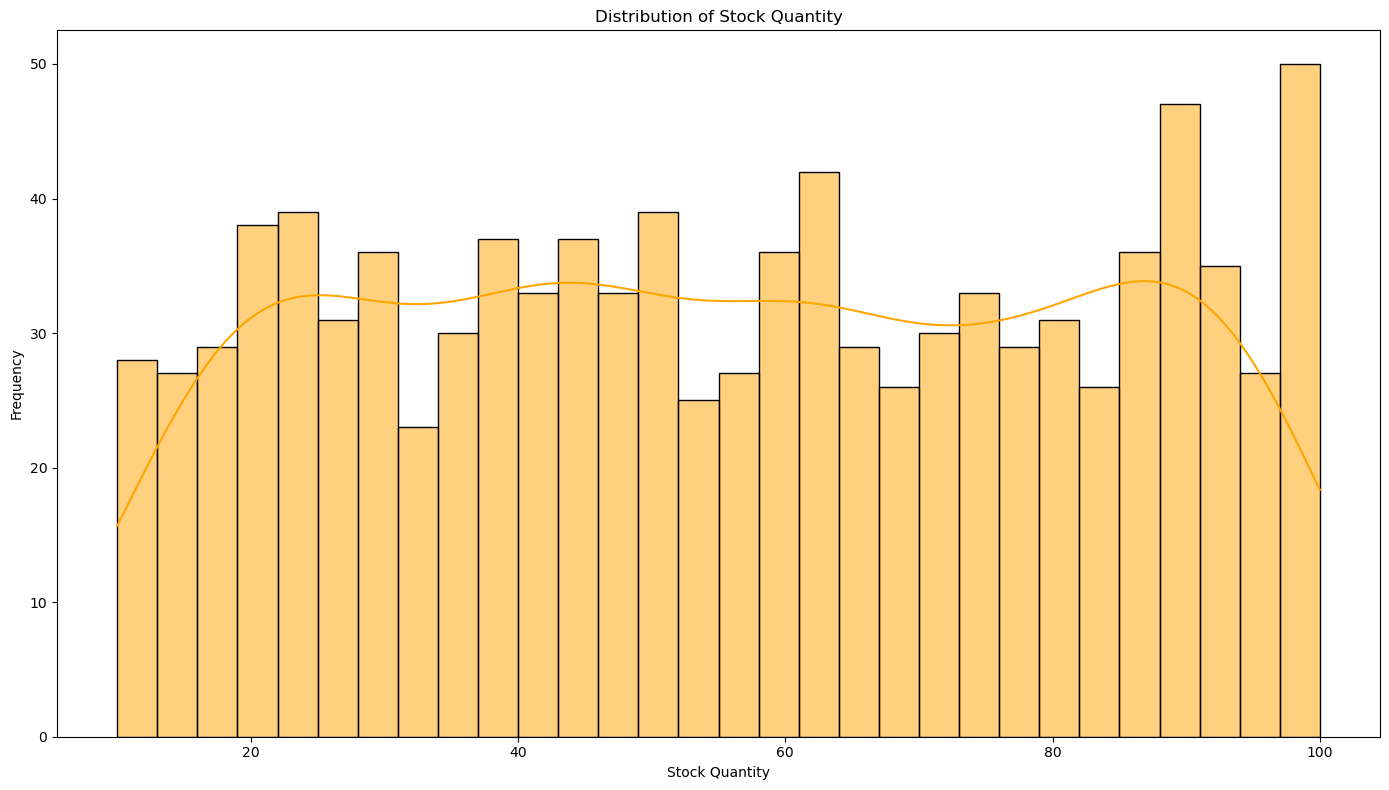

In [93]:
# Inventory distribution

#Shows how stock is distributed across all products.
#Helps detect overstocked or understocked items.
#Gives a sense of inventory health — whether the warehouse is balanced or skewed.


if 'Stock_Quantity' in df.columns:
    plt.figure(figsize=(14,8))
    sns.histplot(df['Stock_Quantity'], bins=30, kde=True, color='orange')
    plt.title("Distribution of Stock Quantity")
    plt.xlabel("Stock Quantity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Category
Fruits & Vegetables    18489
Dairy                  10534
Grains & Pulses         8240
Seafood                 5601
Bakery                  4175
Oils & Fats             4123
Beverages               3822
Name: Stock_Quantity, dtype: int64


C:\Users\mites\AppData\Local\Temp\ipykernel_70892\4062442445.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_stock.values, y=category_stock.index, palette='magma')


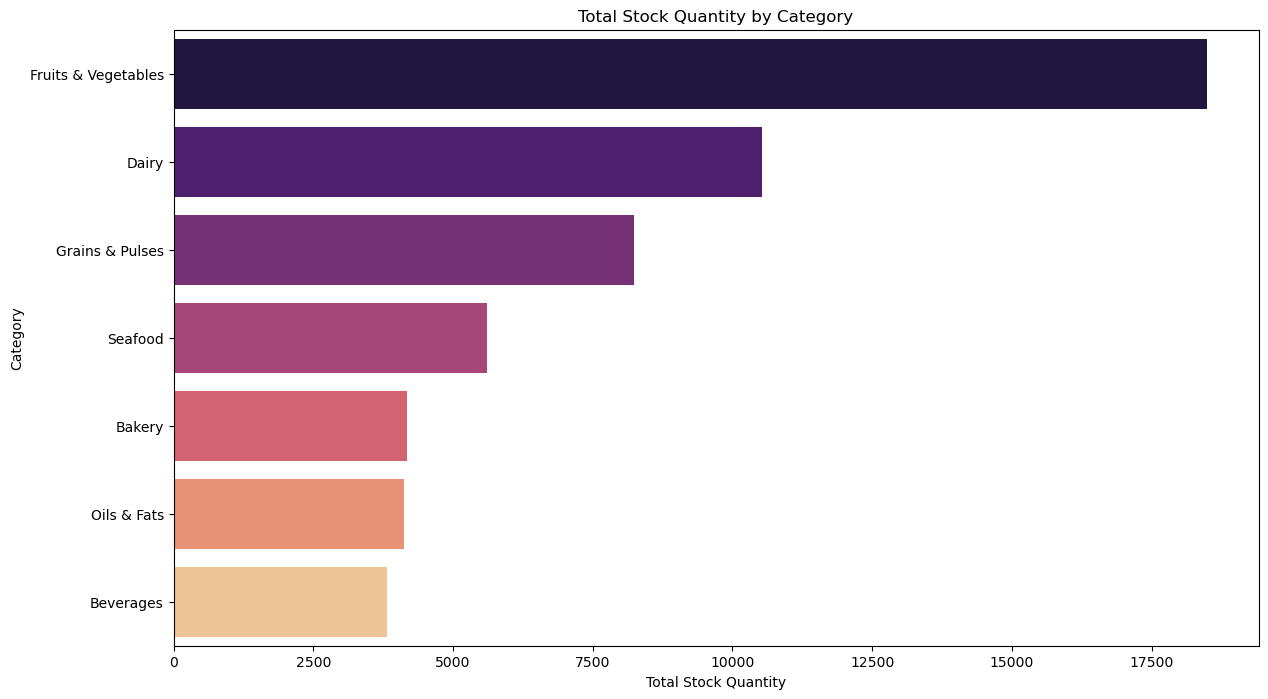

In [ ]:
# we can see inventory distibution according to the categories for clear interpretation of our data


#Aggregates sales by product category (e.g., Beverages, Snacks, Dairy).
#Shows which categories contribute most to revenue.
#Useful for strategic decisions like discounts, promotions, or expanding a category.


if 'Category' in df.columns and 'Stock_Quantity' in df.columns:
    category_stock = df.groupby('Category')['Stock_Quantity'].sum().sort_values(ascending=False)
    print(category_stock)

plt.figure(figsize=(14,8))
sns.barplot(x=category_stock.values, y=category_stock.index, palette='magma')
plt.title("Total Stock Quantity by Category")
plt.xlabel("Total Stock Quantity")
plt.ylabel("Category")
plt.show()

C:\Users\mites\AppData\Local\Temp\ipykernel_70892\4272550658.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='coolwarm')


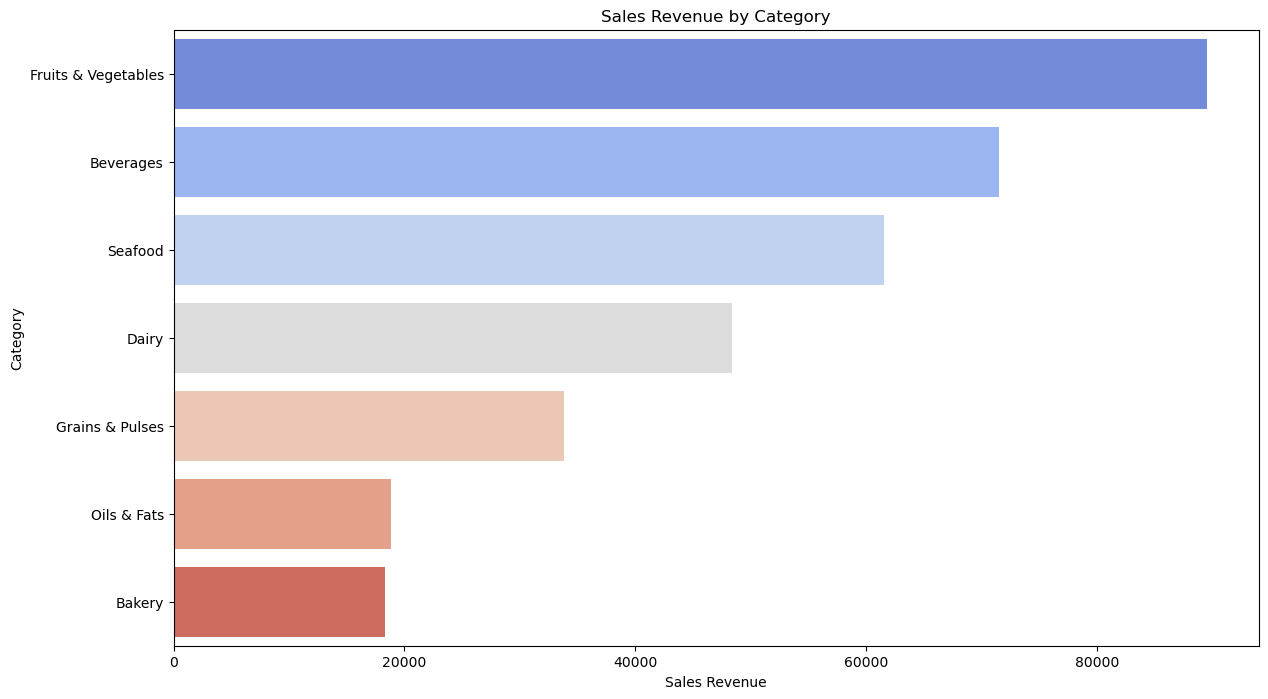

In [95]:
# Category-wise sales revenue

#Aggregates sales by product category (e.g., Beverages, Snacks, Dairy).
#Shows which categories contribute most to revenue.
#Useful for strategic decisions like discounts, promotions, or expanding a category.


if 'Category' in df.columns and 'Sales_Revenue' in df.columns:
    category_sales = df.groupby('Category')['Sales_Revenue'].sum().sort_values(ascending=False)
    plt.figure(figsize=(14,8))
    sns.barplot(x=category_sales.values, y=category_sales.index, palette='coolwarm')
    plt.title("Sales Revenue by Category")
    plt.xlabel("Sales Revenue")
    plt.ylabel("Category")
    plt.show()

C:\Users\mites\AppData\Local\Temp\ipykernel_70892\1445151134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Stock_Quantity', palette='Set2')


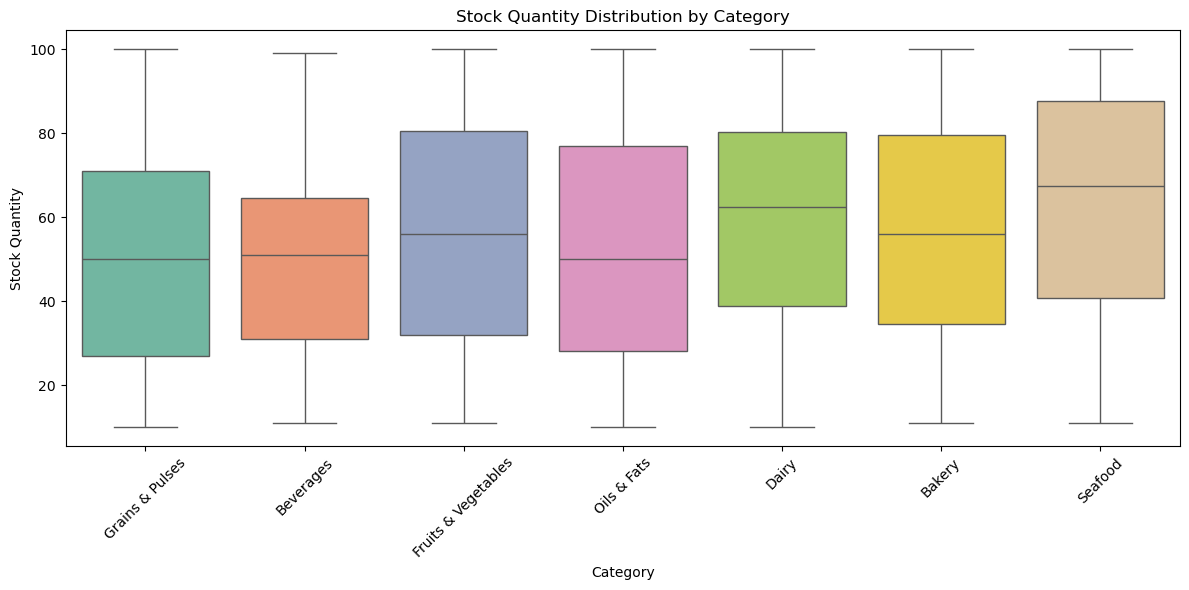

In [102]:

# Boxplot for stock distribution per product category

#  shows how stock quantity is spread and how volatile it is by category.

if 'Category' in df.columns and 'Stock_Quantity' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x='Category', y='Stock_Quantity', palette='Set2')
    plt.title("Stock Quantity Distribution by Category")
    plt.xlabel("Category")
    plt.ylabel("Stock Quantity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



## Analysis of the Charts

#### Fruits & Vegetables, Dairy, and Seafood have the highest total stock and also drive strong sales, while Bakery, Oils & Fats, and Beverages show lower stock and revenue, indicating secondary priority categories.

#### Overall stock quantities are fairly balanced with a slight concentration at higher levels, and revenue is heavily concentrated in a few high-performing products (especially Arabica Coffee and White Tea) that act as key profit drivers.

In [98]:
(df['Category'].unique())

array(['Grains & Pulses', 'Beverages', 'Fruits & Vegetables',
       'Oils & Fats', 'Dairy', 'Bakery', 'Seafood'], dtype=object)

In [99]:
# define perishable categories

perishable_categories = [
    'Fruits & Vegetables', 
    'Dairy', 
    'Bakery', 
     
]
df['Perishable'] = df['Category'].apply(lambda x: 1 if x in perishable_categories else 0)

print("\nPerishable Count:\n", df['Perishable'].value_counts())


Perishable Count:
 Perishable
1    585
0    404
Name: count, dtype: int64


In [108]:
# Save Cleaned dataframe for next steps.
df.to_csv('grocery_inventory_cleaned.csv', index=False)


In [109]:
# Define the file path where you saved the cleaned data

cleaned_file_path = r'C:\Users\mites\Desktop\Final Project\data\grocery_inventory_cleaned.csv'

# Load the CSV file back into a DataFrame named 'df'
df = pd.read_csv(cleaned_file_path)

# Confirm the first few rows of the loaded DataFrame
print(df.head())



    Product_ID     Product_Name             Category  Supplier_ID  \
0  29-205-1132       Sushi Rice      Grains & Pulses  38-037-1699   
1  40-681-9981   Arabica Coffee            Beverages  54-470-2479   
2  06-955-3428       Black Rice      Grains & Pulses  54-031-2945   
3  71-594-6552  Long Grain Rice      Grains & Pulses  63-492-7603   
4  57-437-1828             Plum  Fruits & Vegetables  54-226-4308   

  Supplier_Name  Stock_Quantity  Reorder_Level  Reorder_Quantity  Unit_Price  \
0     Jaxnation              22             72                70         4.5   
1       Feedmix              45             77                 2        20.0   
2        Vinder              30             38                83         6.0   
3    Brightbean              12             59                62         1.5   
4    Topicstorm              37             30                74         4.0   

  Date_Received Last_Order_Date Expiration_Date      Warehouse_Location  \
0    2024-08-16      2024-06-

## Step 1: Loading, Cleaning & EDA completed.

#### Next step 2: Feature Engineering using grocery_inventory_cleaned.csv